<a href="https://colab.research.google.com/github/MohamadRayi/MachineLearningTasks/blob/main/1_Decision_Tree_Rayi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Mohamad Rayi Dwi Putra

NIM 1103213070

Dataset: melb_house.csv

Overview:


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unnamed: 0      Suburb           Address  Rooms Type      Price Method  \
0           1  Abbotsford      85 Turner St      2    h  1480000.0      S   
1           2  Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2           4  Abbotsford      5 Charles St      3    h  1465000.0     SP   
3           5  Abbotsford  40 Federation La      3    h   850000.0     PI   
4           6  Abbotsford       55a Park St      4    h  1600000.0     VB   

  SellerG       Date  Distance  ...  Bathroom  Car  Landsize  BuildingArea  \
0  Biggin  3/12/2016       2.5  ...       1.0  1.0     202.0           NaN   
1  Biggin  4/02/2016       2.5  ...       1.0  0.0     156.0          79.0   
2  Biggin  4/03/2017       2.5  ...       2.0  0.0     134.0         150.0   
3  Biggin  4/03/2017       2.5  ...       2.0  1.0      94.0           NaN   
4  Nelson  4/06/20

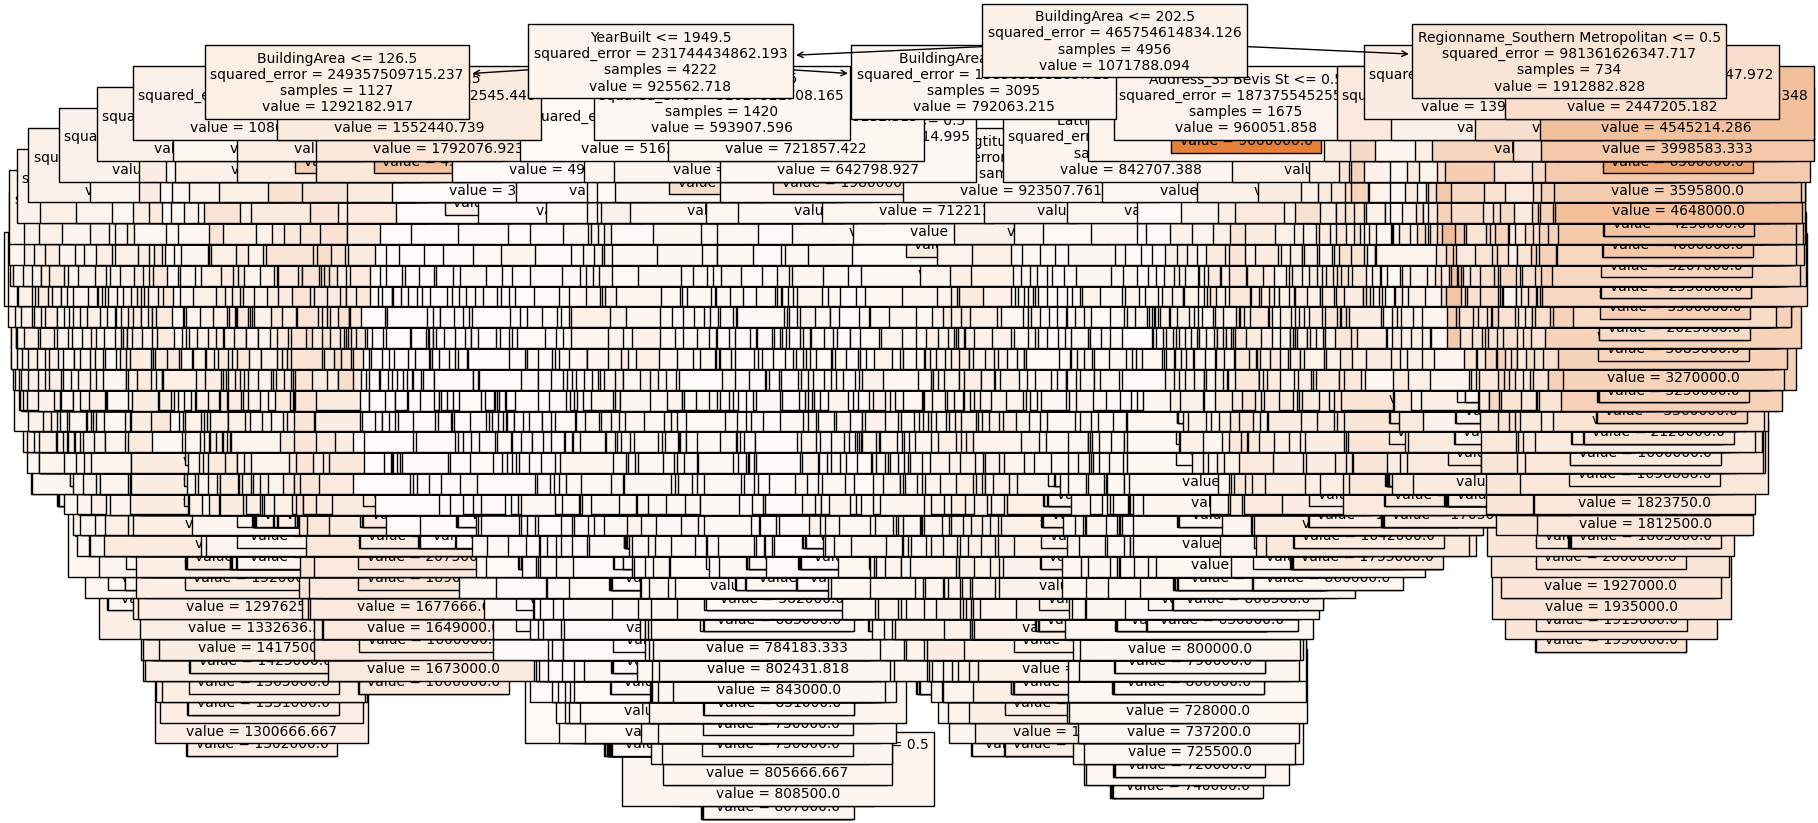

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Mount Google Drive
drive.mount('/content/drive')

# Load data from drive path
path_to_data = "/content/drive/MyDrive/Dataset/melb_data.csv"
data = pd.read_csv(path_to_data)

print(data.head())

# Handling missing values
data_clean = data.dropna()  # Drop rows with NaN values

# Select features (X) and target (y)
X = data_clean.drop(['Price'], axis=1)  # Drop 'Price' column for features
X_encoded = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical features in DataFrame X
y = data_clean['Price']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize Decision Tree model
model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Perform predictions on the test data
y_pred = model.predict(X_test)

# Evaluate model accuracy
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X_encoded.columns, filled=True, fontsize=10)
plt.show()